In [ ]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir adhaar_card_tampering
!mkdir adhaar_card_tampering/image

In [ ]:
original= Image.open(requests.get("https://i.pinimg.com/564x/f5/2c/9a/f52c9aa89c3cfa8d4629c04662a54925.jpg", stream=True).raw)
temp = Image.open(requests.get("https://techgyanhindi.com/wp-content/uploads/2020/12/nakli-aadhar-card-1-221x300.jpeg", stream=True).raw)

In [ ]:
print("Original final format:", original.format)
print("Tempered Final format", temp.format)

Original final format: JPEG
Tempered Final format JPEG


In [ ]:
print("Original file size", original.size)
print("tempered file size", temp.size)

Original file size (489, 627)
tempered file size (221, 300)


In [ ]:
original= original.resize((250,160))
print(original.size)
original.save("adhaar_card_tampering/image/original.jpeg")
temp = temp.resize((250,160))
print(temp.size)
temp.save("adhaar_card_tampering/image/temp.jpeg")

(250, 160)
(250, 160)


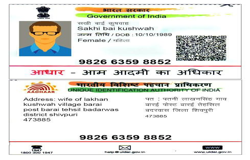

In [ ]:
original

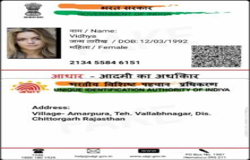

In [ ]:
temp

In [ ]:
original=cv2.imread("adhaar_card_tampering/image/original.jpeg")
temp=cv2.imread("adhaar_card_tampering/image/temp.jpeg")

In [ ]:
original_temp= cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
temp_temp= cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)

In [ ]:
original_temp.shape

(160, 250)

In [ ]:
temp_temp

array([[  0,  40,  70, ...,  84,  40,   0],
       [ 43, 145, 218, ..., 232, 137,  50],
       [ 92, 200, 254, ..., 249, 214,  99],
       ...,
       [105, 200, 251, ..., 252, 212, 111],
       [ 93, 175, 223, ..., 224, 177,  94],
       [ 12,  86, 137, ..., 153,  84,  16]], dtype=uint8)

In [ ]:
original.shape

(160, 250, 3)

In [ ]:
cv2.imwrite("original_temp.jpeg", original_temp)
cv2.imwrite("temp_temp.jpeg", temp_temp)

True

In [ ]:
(score, diff) = structural_similarity(original_temp, temp_temp, full=True)

In [ ]:
print((score, diff))

(0.20441118990429227, array([[ 0.00620074,  0.0063036 ,  0.00619305, ..., -0.002282  ,
        -0.00338581,  0.00365348],
       [ 0.00626096,  0.00629832,  0.00614505, ..., -0.00145248,
        -0.00250949,  0.00465685],
       [ 0.00635122,  0.00653022,  0.00648354, ..., -0.00281102,
        -0.0039356 ,  0.0021445 ],
       ...,
       [ 0.00895334,  0.00878552,  0.00851643, ..., -0.00900561,
         0.00077199,  0.00379428],
       [ 0.00923547,  0.00890224,  0.00859536, ..., -0.00552483,
         0.00064648,  0.00566495],
       [ 0.00933106,  0.00897456,  0.00867425, ..., -0.00601404,
        -0.00047123,  0.00571036]]))


In [ ]:
diff = (diff*255).astype("uint8")

In [ ]:
diff

array([[  1,   1,   1, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   1],
       [  1,   1,   1, ...,   0, 255,   0],
       ...,
       [  2,   2,   2, ..., 254,   0,   0],
       [  2,   2,   2, ..., 255,   0,   1],
       [  2,   2,   2, ..., 255,   0,   1]], dtype=uint8)

In [ ]:
print("SSIM: {}".format(score))

SSIM: 0.20441118990429227


In [ ]:
thresh= cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]

In [ ]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
for c in cnts:
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x,y), (x+w,y+h), (255,0,0), 2 )
  cv2.rectangle(temp, (x,y), (x+w,y+h), (255,0,0), 2 )


Original Format Image


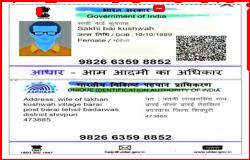

In [ ]:
print('Original Format Image')
Image.fromarray(original)

Tempered Image


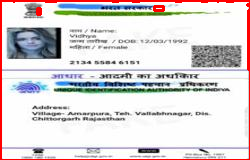

In [ ]:
print('Tempered Image')
Image.fromarray(temp)

Different Image


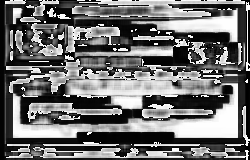

In [ ]:
print('Different Image')
Image.fromarray(diff)

Threshold Image


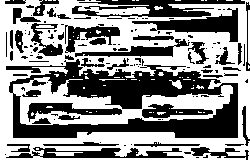

In [ ]:
print('Threshold Image')
Image.fromarray(thresh)